In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("covid-19-data/us-counties.csv")

In [3]:
cook_counties = ((df["county"]=="Cook") & (df["state"]=="Illinois"))

In [4]:
cook_county = df[cook_counties]

In [5]:
cook_county_firstDeath = cook_county["deaths"] > 0

In [6]:
cook_firstDeath = cook_county[cook_county_firstDeath]

In [7]:
print("-------------------------------------------------------------------------")
total_deaths = cook_county[-1:]
print("Yesterday's numbers\n\n" + str(total_deaths))
print("-------------------------------------------------------------------------")

-------------------------------------------------------------------------
Yesterday's numbers

             date county     state     fips  cases  deaths
41275  2020-04-08   Cook  Illinois  17031.0  10520     312
-------------------------------------------------------------------------


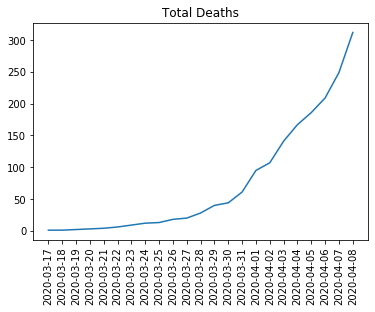

In [8]:
plt.xticks(rotation="90")
plt.title("Total Deaths")
plt.plot(cook_firstDeath["date"], cook_firstDeath["deaths"])

<h4>Plot the number of cases from when the number of cases were greather than 50</h4>

In [9]:
cook_county_firstCase = cook_county["cases"]>50

In [10]:
cook_firstCase = cook_county[cook_county_firstCase]


Total number of cases


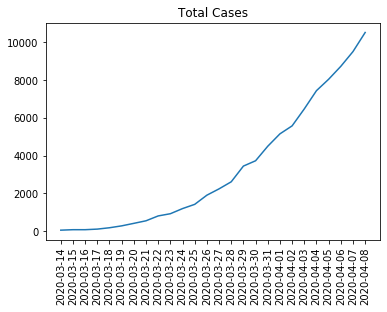

In [11]:
print("\nTotal number of cases")
plt.xticks(rotation = "90")
plt.title("Total Cases")
plt.plot(cook_firstCase["date"], cook_firstCase["cases"])

<h4>Get date of largest increase in death</h4>

In [12]:
print("-------------------------------------------------------------------------")
i = 0
max_deaths = 0
diff = 0
for index, row in cook_county.iterrows():
    if i != 0 and cook_county.loc[index, "deaths"] != 0:
        diff = cook_county.loc[index, "deaths"] - cook_county.loc[prev_index, "deaths"]
        if (diff >= max_deaths):
            if (diff == max_deaths):
                max_date = str(max_date) + ", " + str(cook_county.loc[index, "date"])
            else:
                max_date = cook_county.loc[index, "date"]
            max_deaths = diff
            
    if cook_county.loc[index, "deaths"] != 0 or i == 0:
        prev_index = index
    i = i + 1
print("\nMax deaths in one day: " + str(max_deaths))
print("\nDate of max deaths: " + str(max_date)+"\n")
print("-------------------------------------------------------------------------")

-------------------------------------------------------------------------

Max deaths in one day: 63

Date of max deaths: 2020-04-08

-------------------------------------------------------------------------


<h4>Get the past week's numbers</h4>

In [13]:
print("\n-------------------------------------------------------------------------")
print("The past week's numbers\n")
print(cook_county[-7:])
print("-------------------------------------------------------------------------")


-------------------------------------------------------------------------
The past week's numbers

             date county     state     fips  cases  deaths
26710  2020-04-02   Cook  Illinois  17031.0   5575     107
29012  2020-04-03   Cook  Illinois  17031.0   6473     141
31376  2020-04-04   Cook  Illinois  17031.0   7439     167
33786  2020-04-05   Cook  Illinois  17031.0   8043     186
36239  2020-04-06   Cook  Illinois  17031.0   8728     209
38733  2020-04-07   Cook  Illinois  17031.0   9509     249
41275  2020-04-08   Cook  Illinois  17031.0  10520     312
-------------------------------------------------------------------------


<h4>Total deaths overnight</h4>

In [14]:
print("-------------------------------------------------------------------------")
total_overnight_deaths = cook_county.iloc[-1]["deaths"] - cook_county.iloc[-2]["deaths"]
print("Total overnight deaths = " + str(total_overnight_deaths))
print("-------------------------------------------------------------------------")

-------------------------------------------------------------------------
Total overnight deaths = 63
-------------------------------------------------------------------------
